In [1]:
import pandas as pd

## Load Dataset

In [2]:
# 경로(ex: data/train.csv)는 사용자 설정마다 다를 수 있음
train = pd.read_csv("data/bike/train.csv", parse_dates=["datetime"])

# train["datetime"].dt.year # (month / day / hour / minute / second)

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("data/bike/test.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### Parse datetime

In [4]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train.head()

(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [5]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test.head()

(6493, 16)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3


## Explore

In [6]:
%matplotlib inline
import seaborn as sns

### datetime

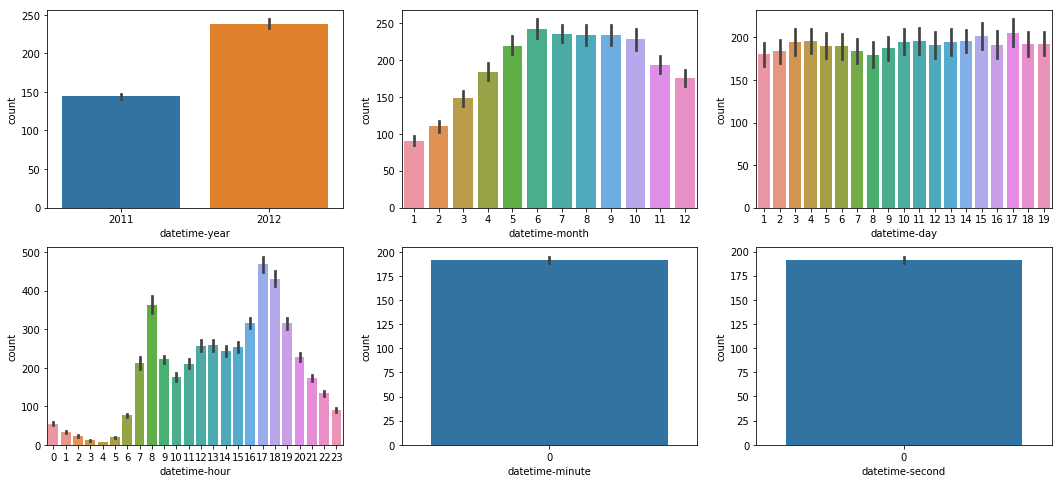

In [7]:
import matplotlib.pyplot as plt

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

In [8]:
# str == string == 문자열
train["datetime-year_month"] = train["datetime-year"].astype('str') + "-" + train["datetime-month"].astype('str')

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 20)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


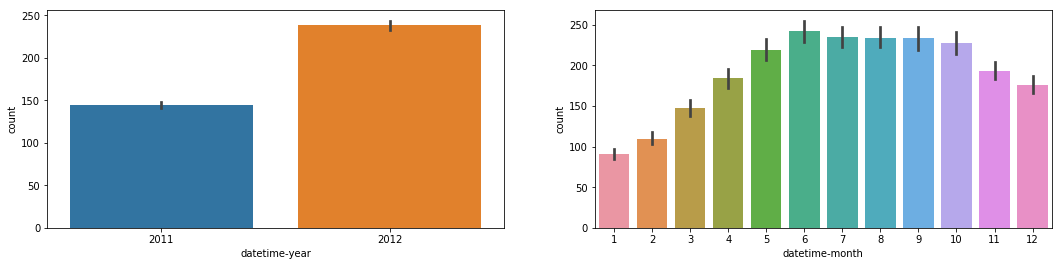

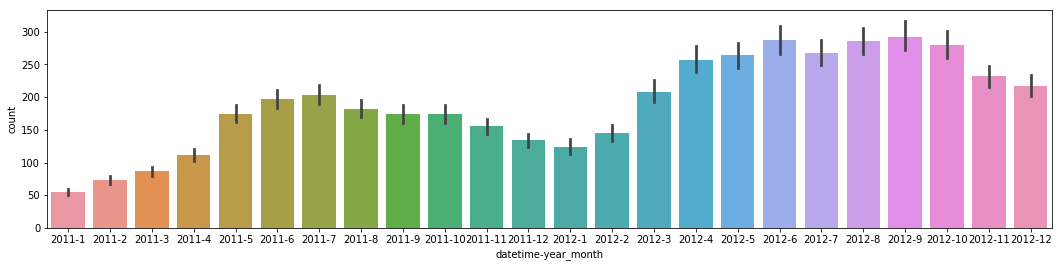

In [9]:
import matplotlib.pyplot as plt

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

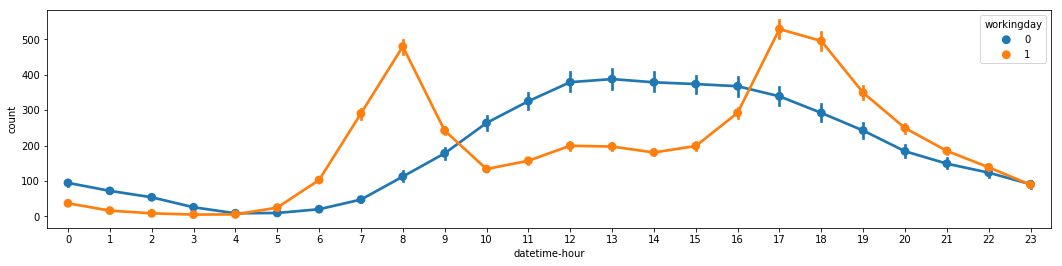

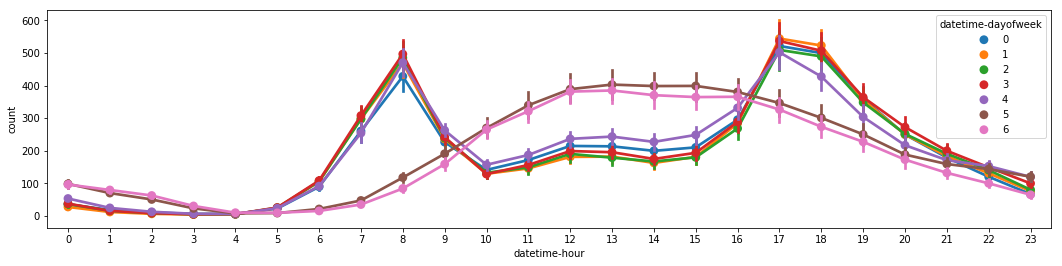

In [10]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)

figure, ax2 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

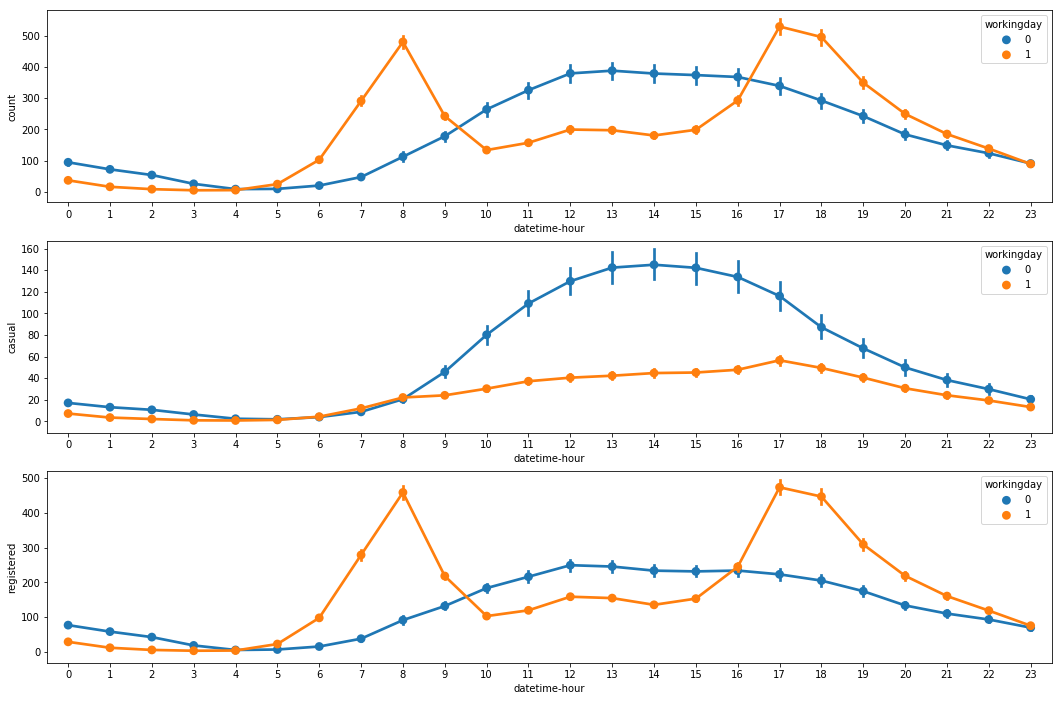

In [11]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18, 12)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="casual", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="datetime-hour", y="registered", hue="workingday", ax=ax3)

## Train

In [12]:
feature_names = ["season", "holiday", "workingday", "weather",
                 "temp", "atemp", "humidity", "windspeed",
                 "datetime-year", "datetime-hour", "datetime-dayofweek"]
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [13]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [14]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [15]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [16]:
import numpy as np

y_train = np.log(y_train + 1)

print(y_train.shape)
y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

### Score

Evaluation Metric = **Root Mean Squared Logarithmic Error** (RMSLE)
$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [17]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
#     log_predict = np.log(predict + 1)
#     log_actual = np.log(actual + 1)
    
#     difference = log_predict - log_actual
    difference = predict - actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

## Tune Hyperparameter

### Case 1 - Grid Search

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# n_estimators = 100
n_estimators = 10

max_depth_list = [3, 5, 7, 9, 11]
max_features_list = [0.1, 0.3, 0.5, 0.7, 0.9]

for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      max_features=max_features,
                                      random_state=37)

        score = cross_val_score(model, X_train, y_train,
                                cv=20, scoring=rmsle_scorer).mean()

        print(f"n_estimators = {n_estimators}, max_depth = {max_depth}, max_features = {max_features:.6f}, score = {score:.5f}")
        # print("Score = {0:.5f}".format(score))

n_estimators = 10, max_depth = 3, max_features = 0.100000, score = 1.16324
n_estimators = 10, max_depth = 3, max_features = 0.300000, score = 0.91338
n_estimators = 10, max_depth = 3, max_features = 0.500000, score = 0.78188
n_estimators = 10, max_depth = 3, max_features = 0.700000, score = 0.76215
n_estimators = 10, max_depth = 3, max_features = 0.900000, score = 0.75339
n_estimators = 10, max_depth = 5, max_features = 0.100000, score = 0.95785
n_estimators = 10, max_depth = 5, max_features = 0.300000, score = 0.78237
n_estimators = 10, max_depth = 5, max_features = 0.500000, score = 0.63272
n_estimators = 10, max_depth = 5, max_features = 0.700000, score = 0.60950
n_estimators = 10, max_depth = 5, max_features = 0.900000, score = 0.58786
n_estimators = 10, max_depth = 7, max_features = 0.100000, score = 0.86845
n_estimators = 10, max_depth = 7, max_features = 0.300000, score = 0.65033
n_estimators = 10, max_depth = 7, max_features = 0.500000, score = 0.52556
n_estimators = 10, max_de

### Case 2 - Random Search

In [19]:
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score

# # n_estimators = 100
# n_estimators = 10

# num_epoch = 100

# for epoch in range(num_epoch):
#     max_depth = np.random.randint(2, 100)
#     max_features = np.random.uniform(0.1, 1.0)

#     model = RandomForestRegressor(n_estimators=n_estimators,
#                                   max_depth=max_depth,
#                                   max_features=max_features,
#                                   random_state=37)

#     score = cross_val_score(model, X_train, y_train,
#                             cv=20, scoring=rmsle_scorer).mean()

#     print(f"epoch = {epoch}, n_estimators = {n_estimators}, max_depth = {max_depth}, max_features = {max_features:.6f}, score = {score:.5f}")

### Finer Search

In [20]:
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score

# # n_estimators = 100
# n_estimators = 10

# num_epoch = 100

# for epoch in range(num_epoch):
#     max_depth = np.random.randint(20, 100)
#     max_features = np.random.uniform(0.6, 1.0)

#     model = RandomForestRegressor(n_estimators=n_estimators,
#                                   max_depth=max_depth,
#                                   max_features=max_features,
#                                   random_state=37)

#     score = cross_val_score(model, X_train, y_train,
#                             cv=20, scoring=rmsle_scorer).mean()

#     print(f"epoch = {epoch}, n_estimators = {n_estimators}, max_depth = {max_depth}, max_features = {max_features:.6f}, score = {score:.5f}")

In [21]:
model = RandomForestRegressor(n_estimators=3000,
                              max_depth=83,
                              max_features=0.851358,
                              random_state=37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=83,
           max_features=0.851358, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [22]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=83,
           max_features=0.851358, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [23]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions

(6493,)


array([ 2.51350713,  1.73330699,  1.41848543, ...,  4.59957903,
        4.58914414,  3.87335626])

In [24]:
predictions = np.exp(predictions) - 1

print(predictions.shape)
predictions

(6493,)


array([ 11.34816083,   4.65933836,   3.13085924, ...,  98.44244437,
        97.4101687 ,  47.1035637 ])

## Submit

In [25]:
submit = pd.read_csv("data/bike/sampleSubmission.csv")

print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [26]:
submit["count"] = predictions

print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.348161
1,2011-01-20 01:00:00,4.659338
2,2011-01-20 02:00:00,3.130859
3,2011-01-20 03:00:00,3.274112
4,2011-01-20 04:00:00,2.688771


In [27]:
submit.to_csv("data/bike/baseline-script_tunning.csv", index=False)